### ___c.f.___ df ['col_name'] [0:2] == df [0:2] ['col_name']

# 시계열 데이터 특성
#### 크게 중요한 3가지 Component(구성 요소)가 있다
 - ### ___Trends___
 - ### ___Seasonality___
 - ### ___Cyclical___
 - ### 추가적으로 ___noise___가 있다. (따로 컴포넌트로 분류하지는 않음)

## ___Trends___
####   긴 term에 대해서 올라가거나(Upward), 내려가거나(Downward), 유지되는(Horizontal/Stationary) 경향이 있다면 Trends가 있다고 한다

## ___Seasonality___ - 반복되는 트렌드
#### 비교적 짧은 term으로 반복되는 경우가 있을 경우 Seasonality가 있다고 한다 (최소 2 ~ 3번 정도 반복되어야 한다)
#### 꼭 2, 3번 정해진 게 아니라 패턴이 많이 발생해야 Seasonality가 있다고 한다

## ___Cyclical___  (순환적) - 일정하지 않은 기간의 트렌드
### 주기가 일정하지 않은 변화, 경향성

# ETS 모델___(Error Trend Seasonality Modeling)___

 - ### 데이터의 패턴을 더 잘 파악하기 위해서 또는 예측을 수행하기 위해 Smoothing을 합니다.
 - ### Smoothing 위해서 Error, Trend, Seasonality 요소들을 활용하는데, 각각을 더하거나 곱하여 Smoothing을 합니다.
 - ### 또한 이것들을 가지고 시계열 데이터를 모델링 할 수 있습니다.

## ___ETS Decomposition___
 - ### ETS 컴포넌트들을 시각화 하는 것은 데이터의 흐름을 이해하는데 큰 도움이 됩니다.

### ___c.f.___ 순수한 에러(residual)은 어떠한 Trend나 Correlation이 나타나선 안된다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# y_t('y t'시점의 데이터) = Level(=Cyclical Component) + Trend + Seasonality + Noise(=Error) 로 표시할 수 있다.
    # Level 데이터는 Decomposition을 할 수가 없어서 Noise로 들어간다
# y_t = Trend + Seasonality + Error
    # 뒤에서 Error 안에서 Cyclical 데이터를 뽑아내기 위해서 패턴을 분석하는 방법이 나온다.

In [ ]:
# 시계열 데이터에서 ETS Modeling을 하려면
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 실험용으로 데이터를 만든다(상향 트렌드를 가지고 있는 데이터 100개)
series = pd.Series([i + np.random.randint(10) for i in range(1, 100)])
    # +-10 의 Noise 가 섞였지만 여전히 상향 트렌트 유지

In [ ]:
result = seasonal_decompose(series, model='additive', freq=1)
    # Sample Frequence는 배열로 주면 'freq' Hyper-parameter 을 안줘도 되는데 Series로 줬기 때문에 써준다.

In [ ]:
result.plot();
    # semi-column을 안붙여주면 결과가 두 번 return 된다

In [ ]:
# noise를 줘서 짜글짜글해졌다. Seasonality 패턴은 없다. Trend만 있다
# Decomposition 했을 때 Trend만 나타난다 (residual도 안잡힌다. Only Trend로 잡힘)

In [ ]:
# 위의 그래프를 좀 더 보기 좋게 다듬어보자면
def plot_decompose(decompose_result):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
        # subplots은 row 갯수와 col 갯수를 앞에 정의하고 정의된 만큼 subplot들을 return 해준다
        # fig(=figure)는 전체 도표를 의미하고
        # ax는 각 subplot을 의미한다.
    decompose_result.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')    
    decompose_result.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')    
    decompose_result.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Residual')

In [ ]:
plot_decompose(result)

In [31]:
# Multiplicative Model
# y_t = Level * Error * Trend * Seasonality
    # 데이터가 Exponentional한 모습을 보여준다면 곱하기 모델을 사용한다.
    # 하지만 앞에 log(y_t)로 바꿔주면 곱하기가 더하기로 풀리기 때문에 
    # Additive Model이나 Multiplicative Model이나 다 더하기 모델로 생각해주시면 편하다.
series = pd.Series([i ** 2 for i in range(1, 100)])

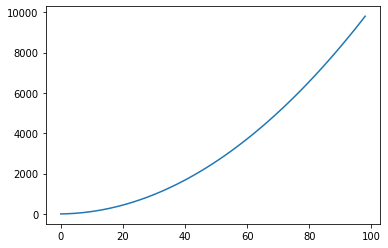

In [32]:
series.plot()

In [34]:
result = seasonal_decompose(series, model='multiplicative', freq=1)

C:\Users\rangs\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


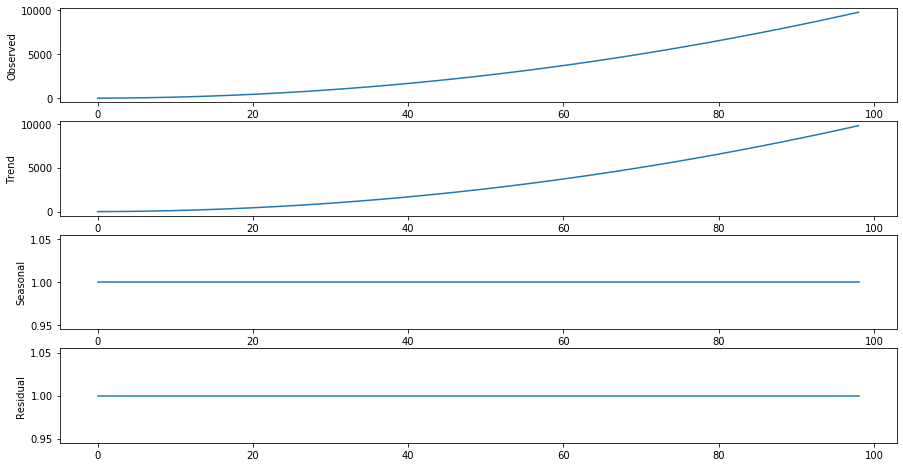

In [35]:
plot_decompose(result)

In [36]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month')

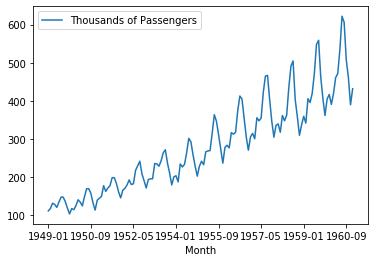

In [38]:
airline.plot()

In [39]:
    # 월별 승객 수가 상향 Trend를 보여주면서 똑같은 패턴으로 anually 반복됐다(=Seasonality를 가지고 있다)
    # 증가 추이가 약간 곡선(지수적 증가)을 보이는 거 같기도 하다(=Multiplicative Model로 Decompose를 해도 큰 문제가 없다)

In [40]:
airline.index = pd.to_datetime(airline.index)

In [41]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [42]:
    # index를 datetime index로 바꾸니까 default로 매월 1일로 채워넣었다.

In [43]:
result = \
seasonal_decompose(airline['Thousands of Passengers'], 
                   model='multiplicative')

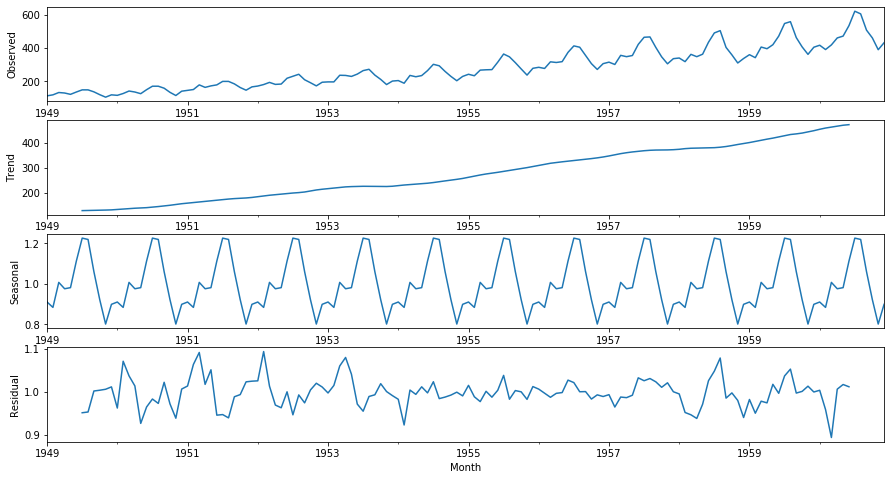

In [45]:
plot_decompose(result)

In [ ]:
    # residual 이 나타났으나 눈에 띄는 패턴은 나타나지 않았다.
    # 하지만 나중에 배우는 알고리즘으로 분석하면 residual 안에서도 패턴을 발견할 수 있다.
    # 시계열 데이터를 분석하고 모델링한다는 것은
        # Trend를 제거하고 Seasonality를 뺀 다음, Noise에서 패턴을 얻어서 모델링을 하고 다시 Prediction을 할 때는 그 모델에 Seasonality와 Trend를 더하는 방식으로 진행한다.
        